# Acommodations

Responses here do not lend themselves easily to plots for two reasons. First, most people do not need accomodations, but for those that do need it, they have very specific requirements.

In [3]:
from config import survey, plot_wordcloud, make_wordcloud, build_attend
import altair as alt

First, when asked how much of an issue accomodation might be in preventing attendance, the response was very low. The numbers in these plots can be interpreted as:

* 1 - Likely will prevent me from attending
* 2 - Might prevent me from attending
* 3 - Could attend, but might limit participation
* 4 - Not a concern
* 5 - Unknown

In [4]:
brush = alt.selection_single(encodings=['y'])
attend = build_attend(selection=brush)

charts = [
    {
        'name': "COVID",
        'col': "worried_covid"
    },
    {
        'name': "Funding",
        'col': "worried_funding"
    },
    {
        'name': "Length",
        'col': "worried_length"
    },
    {
        'name': "Accessability",
        'col': "worried_accessibility"
    },
    {
        'name': "Responsibilities",
        'col': "worried_responsibilities"
    },
]

c_list = [
    (alt.Chart(data=survey, title=c_info['name'])
    .transform_filter(brush)
    .mark_bar()
    .encode(
        x=alt.X(shorthand=f"{c_info['col']}:N", title="", axis=alt.Axis()),
        y=alt.Y(shorthand="count()",title="Number of people", scale=alt.Scale(domain=(0, 650))),
        tooltip=alt.Tooltip("count():N"),
    )
    )
    for c_info in charts
]

c = None
for p in c_list:
    if c is None:
        c = p
    else:
        c = c | p

attend & c

alt.VConcatChart(...)

## Hearing

Unfortunately it was not possible to analyze the data easily, and directly. Google can accomodate commas in the text, but also between anwers - so it was impossible to tell the difference between the two types of answers. As a result we had to analyze this by hand.

* 14% of respondents indicated that at least one of the hearing-related accommodations would be helpful.
* 2% indicated that live captioning or ASL interpretation would be necessary for their full participation.
* 1% said an assistive listening device or amplification service would be helpful.

## Other accomodations

23% of respondents indicated that another accommodation would increase accessibility of Snowmass for them: 

* 16%: A "Quiet Zone" near the meeting rooms where people can go to rest without interaction
* 9%: Seating available at all events, breaks, meals, discussion areas
* 3%: Assistance in traveling around campus
* 4%: Use of colorblindness-friendly color schemes in presentations
* 1%: Alt-text describing images in presentations
* 1%: Specific furniture

## Comments

We also asked for comments. Not a lot of people left comments, so pulling themes out is circumspect.

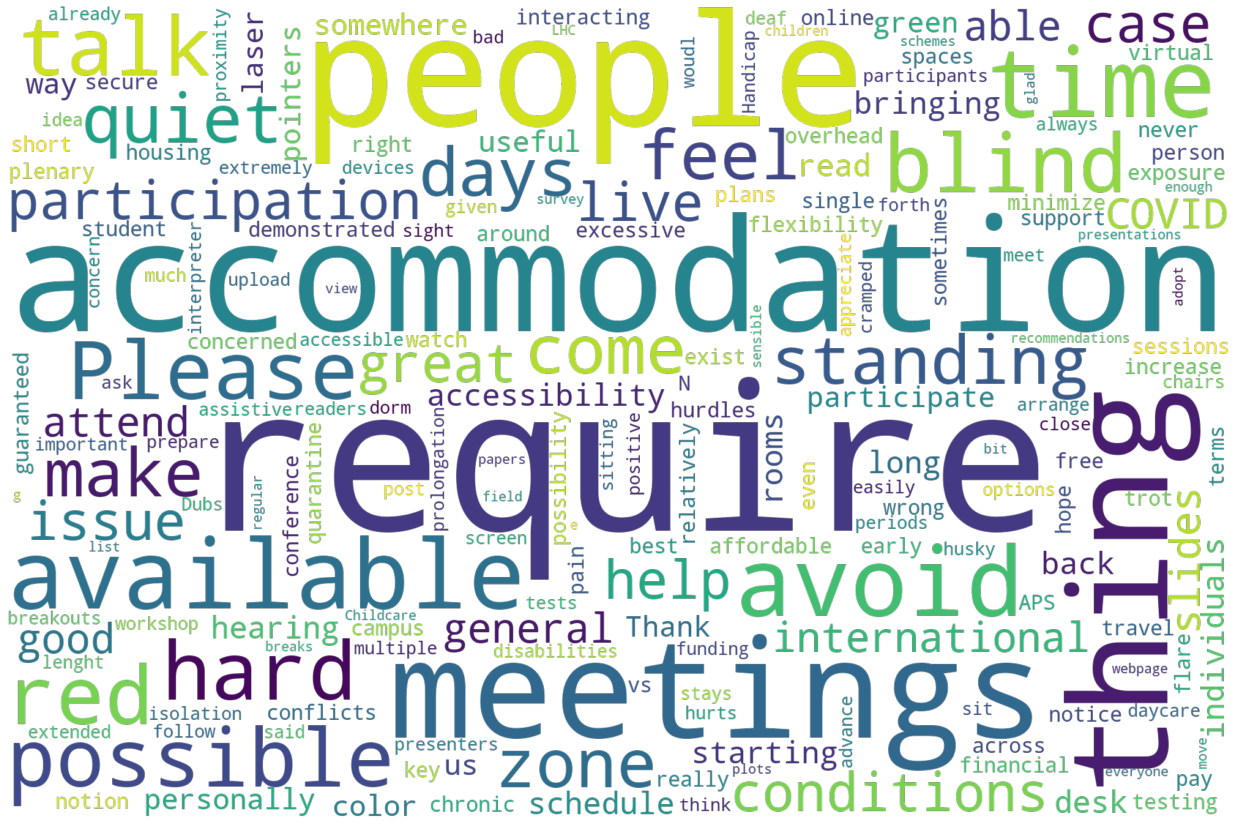

In [5]:
plot_wordcloud(make_wordcloud(survey['acc_comments'], ['meeting', 'need']))

People suggested many other types of accommodations:

* Provide time and space for spur-of-the-moment discussions between attendees
* Plan frequent and long-enough breaks
* Have people upload talks ahead of time
* Provide guidance on how to use colorblindness-friendly color schemes
* Require green laser pointers
* Plan breaks that are long and frequent enough
* Ensure mobility-related accessibility of buildings and accommodations
* Hold all events close to each other and to accommodations
* Have good chairs as well as some tables and standing desks in meeting rooms
* Provide private space for medical procedures and breastfeeding
* Spell out acronyms
* Accommodate dietary restrictions
* Provide masks
* Provide a remote or hybrid attendance option
* Make plenaries available online
* Avoid weekends
* Make it possible to participate for partial meeting
* Provide childcare assistance (financial and logistical)
* Provide financial assistance with conference costs
* Provide refunds if covid prevents travel
* Support participants required to isolate because of covid
* Provide private space to attend non-Snowmass meetings
